In [71]:
# import data
import pandas as pd
df = pd.read_csv('diamonds.csv') 
df = df.rename(columns={"Unnamed: 0": "id"})
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


# Initial Data Analysis



In [72]:
def manualEncoder(df, label, values):
    arr = df[label].to_numpy()
    for i in range (len (arr)): 
        item = arr[i]
        inde = values.index(item)

        arr[i] = inde

    df[label] = arr
    
    return df
# Preprocess Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np

seed = 309

y = df[['price']]
x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

# cut
x_train = manualEncoder(x_train, 'cut', ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
x_test = manualEncoder(x_test, 'cut', ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])

# color
# "The scale begins with the letter D, representing colorless, and continues with increasing presence of color to the letter Z, or light yellow or brown." - google
# https://www.gia.edu/gia-about/4cs-color#:~:text=GIA's%20color%2Dgrading%20scale%20for,defined%20range%20of%20color%20appearance.
# because that's a spectrum, ordinal encode
x_train = manualEncoder(x_train, 'color', ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x_test = manualEncoder(x_test, 'color', ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

# see dataset documentation for reasoning on the order
clarityOrder = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
x_train = manualEncoder(x_train, 'clarity', clarityOrder)
x_test = manualEncoder(x_test, 'clarity', clarityOrder)

# scale
toScale = ['carat', 'depth', 'table', 'x', 'y', 'z']
scalers = []
for label in toScale:
    scaler = MinMaxScaler()
    x_train[label] = scaler.fit_transform(x_train[[label]])
    x_test[label] = scaler.transform(x_test[[label]])
    scalers.append(scalers)
    
# scale price
priceScaler = MinMaxScaler()
y_train['price'] = scaler.fit_transform(y_train[['price']])
y_test['price'] = scaler.transform(y_test[['price']])

# updated data
print("Pre-processed Data: ")
display(x_train)
display(y_train)

display(x_test)
display(y_test)


Pre-processed Data: 


,carat,cut,color,clarity,depth,table,x,y,z
36878,0.045738,0,1,4,0.519444,0.250000,0.446927,0.081834,0.093396
18820,0.172557,0,3,5,0.519444,0.250000,0.600559,0.111375,0.125786
53406,0.128898,0,1,2,0.530556,0.230769,0.562384,0.102037,0.117610
25954,0.249480,0,3,5,0.494444,0.269231,0.671322,0.122750,0.138050
13825,0.166320,2,1,4,0.569444,0.250000,0.593110,0.107301,0.126730
...,...,...,...,...,...,...,...,...,...
33475,0.024948,0,2,4,0.513889,0.250000,0.411546,0.074703,0.085220
9617,0.234927,1,3,2,0.508333,0.307692,0.657356,0.117657,0.134906
5089,0.170478,4,2,2,0.625000,0.307692,0.583799,0.105942,0.128931
45319,0.024948,3,1,1,0.569444,0.250000,0.404097,0.074363,0.087107


,price
36878,0.034115
18820,0.399059
53406,0.126568
25954,0.800551
13825,0.286873
...,...
33475,0.027087
9617,0.232861
5089,0.185283
45319,0.010651


,carat,cut,color,clarity,depth,table,x,y,z
48107,0.062370,0,3,6,0.486111,0.230769,0.479516,0.087097,0.097799
38948,0.022869,3,5,3,0.577778,0.250000,0.397579,0.073345,0.086164
9301,0.166320,3,1,1,0.580556,0.269231,0.587523,0.107640,0.127044
9206,0.220374,4,5,2,0.605556,0.269231,0.626629,0.113582,0.136792
53638,0.020790,0,0,1,0.500000,0.269231,0.399441,0.073514,0.082704
...,...,...,...,...,...,...,...,...,...
48792,0.124740,1,6,2,0.477778,0.307692,0.565177,0.101019,0.113836
44389,0.043659,0,0,5,0.536111,0.269231,0.444134,0.080306,0.093082
1211,0.126819,0,1,2,0.477778,0.269231,0.567970,0.102886,0.115094
2871,0.145530,1,5,1,0.461111,0.326923,0.593110,0.105942,0.118239


,price
48107,0.086938
38948,0.008759
9301,0.229563
9206,0.228374
53638,0.012165
...,...
48792,0.091641
44389,0.067853
1211,0.141166
2871,0.159440


# Exploratory Data Analysis


The correlation of data with price shows to be strongest among carat and the size, which is reasonable and to be expected; a larger, better quality diamond will be more expensive than a small, bad quality one. The ID can be ignored.

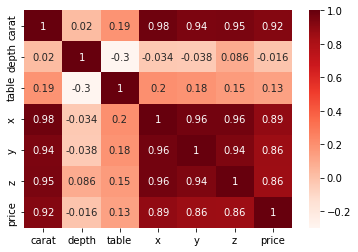

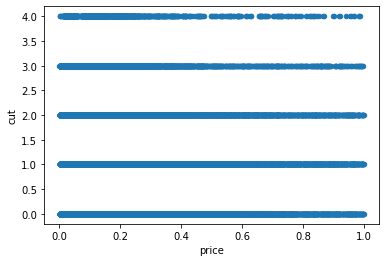

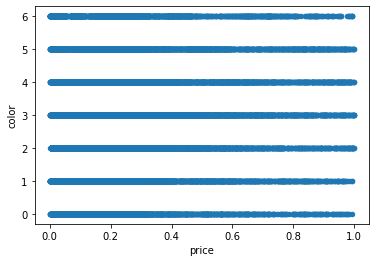

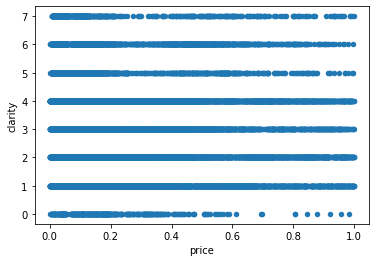

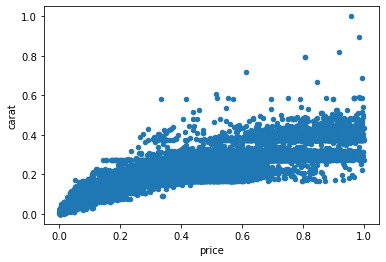

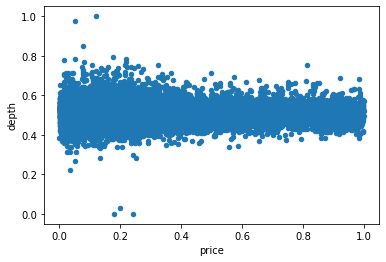

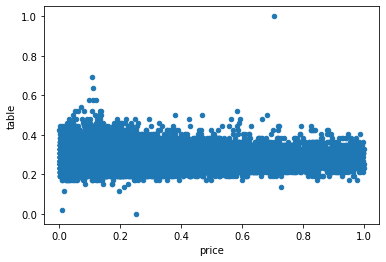

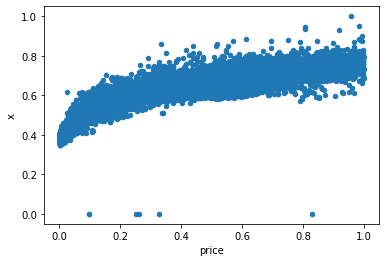

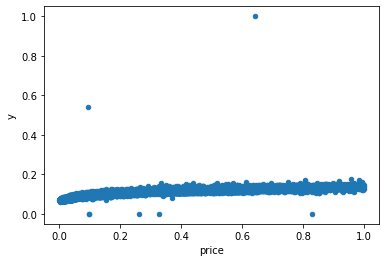

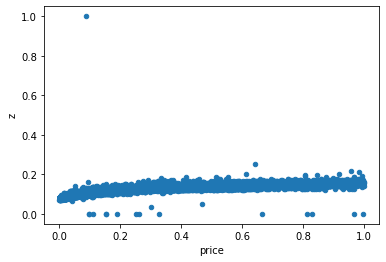

In [73]:
# data analysis

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([x_train, y_train], axis=1)

cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

for label in ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x', 'y', 'z']: 
    df.plot.scatter(x = 'price', y =  label);

In [75]:
# Build classification (or regression) models using the training data

# You should use the following 10 regression algorithms implemented in scikit-learn to perform regression. These 10
# algorithms are very popular regression methods: (1) linear regression, (2) k-neighbors regression, (3) Ridge regression,
# (4) decision tree regression, (5) random forest regression, (6) gradient Boosting regression, (7) SGD regression, (8)
# support vector regression (SVR), (9) linear SVR, and (10) multi-layer perceptron regression. You are encouraged to
# read the documentation (and provided references if you would like to know more details) about these methods from
# scikit-learn, e.g. linear regression is implemented in sklearn.linear model.LinearRegression.

from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

import time


models = [LinearRegression(),  KNeighborsRegressor(), Ridge(), DecisionTreeRegressor(), 
          RandomForestRegressor(), GradientBoostingRegressor(), SGDRegressor(),
          SVR(), LinearSVR(), MLPRegressor()]

names = ["Linear Regression", "K Neighbours Regressor", "Ridge Regression", "Decision Tree Regressor", 
        "Random Forest Regressor", "Gradient Boosting Regressor", "SGD Regressor",  "SVR", "SVR Linear", 
         "Multi Layer Perceptron Regressor"]

answers = []
scores = []
timeDelta = []

for i in range (len (models)):
    print(names[i])
    
    time1 = time.time()
    
    model = models[i]
    model.fit(x_train, y_train)
    ans = model.predict(x_test)
    
    time2 = time.time()
    
    timeDelta.append(time2-time1)
    
    answers.append(ans)
    
    sc = model.score(x_test, y_test)
    print("--> Score: ", sc)
    scores.append(sc)
    

Linear Regression
--> Score:  0.8929578992794374
K Neighbours Regressor
--> Score:  0.9584562811767919
Ridge Regression
--> Score:  0.8926653416067771
Decision Tree Regressor
--> Score:  0.9657983284752271
Random Forest Regressor


C:\Users\Ella\AppData\Local\Temp\ipykernel_4424\3977573237.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


--> Score:  0.9814235358158735
Gradient Boosting Regressor


D:\Programs\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> Score:  0.9722445493836419
SGD Regressor
--> Score:  0.857356015830329
SVR


D:\Programs\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> Score:  0.9110928217389728
SVR Linear


D:\Programs\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> Score:  0.8749066098423046
Multi Layer Perceptron Regressor
--> Score:  0.9672407435883718


In [ ]:
# Evaluate models by using cross validation (Optional)

In [98]:
# Assess model on the test data.
# Report the results (keep 2 decimals) of all the 10 regression algorithms on the test data in terms of mean
# squared error (MSE), root mean squared error (RMSE), relative squared error (RSE), mean absolute error
# (MAE), and execution time. You should report them in a table.

import math

def meanSquaredError(myAnswer, trueAnswer): 
    ans = 0.0
    
    for i in range (len (trueAnswer)):
        ans = ans + ((trueAnswer.iat[i, 0] - myAnswer[i]) * (trueAnswer.iat[i, 0] - myAnswer[i]))
    
    return (ans/len(trueAnswer))

def rootMeanSquaredError(myAnswer, trueAnswer):
    ans = 0.0
    
    for i in range (len (trueAnswer)):
        ans = ans + ((trueAnswer.iat[i, 0] - myAnswer[i])* (trueAnswer.iat[i, 0] - myAnswer[i]))
    
    return math.sqrt(ans/len(trueAnswer))


def meanAbsoluteError(myAnswer, trueAnswer):
    ans = 0.0
    
    for i in range (len (trueAnswer)):
        ans = ans + (abs(trueAnswer.iat[i, 0] - myAnswer[i]))
    
    return (ans/len(trueAnswer))


def relativeSquaredError(myAnswer, trueAnswer):
    # meanTrue
    meanTrue = 0.0
    for i in range (len (trueAnswer)):
        meanTrue = meanTrue + trueAnswer.iat[i, 0]
        
    meanTrue = meanTrue / len(trueAnswer)
    
    sqrtError1 = meanSquaredError(myAnswer, trueAnswer)
    sqrtError2 = meanSquaredError(myAnswer, pd.DataFrame([meanTrue] * len(trueAnswer)))
    
    return sqrtError1 / sqrtError2

header = ["Types of Error"]
header = header + names
msq = ["Mean Squared Error"]
rmsq = ["Root Mean Squared Error"]
rse = ["Relative Squared Error"]
mae = ["Mean Absolute Error"]
time = ["Execution Time"]          
time = time + timeDelta
sc = ["Scores"]
sc = sc + scores

for i in range ( len(answers) ) : 
    result = answers[i]
    
    msq.append(meanSquaredError(result, y_test))
    rmsq.append(rootMeanSquaredError(result, y_test))
    rse.append(relativeSquaredError(result, y_test))
    mae.append(meanAbsoluteError(result, y_test))
    


**Part 1 - Regression - Report**

*• Based on exploratory data analysis, discuss what preprocessing that you need to do before regression, and provide evidence and justifications.*

The basic pre-processing that needs to be done is scaling all numeric data (carat, x, y, z, table, depht, price) and encoding all categorical data. All given categorical data can be ordinal encoded, as all are a range of values that are clearly ordered (colour: range from clear to yellow/brown, which is clearly ordered, general quality (following clear quality standards), cut quality (also following clear standards)). Sources for each order have been noted as comments with the respective encoders.

*• Report the results (keep 2 decimals) of all the 10 regression algorithms on the test data in terms of mean squared error (MSE), root mean squared error (RMSE), relative squared error (RSE), mean absolute error (MAE), and execution time. You should report them in a table.*

In [99]:
import tabulate
data = [header, msq, rmsq, rse, mae, time, sc]

# fixing weird arrays
data[1][1] = data[1][1][0]
data[1][2] = data[1][2][0]
data[1][3] = data[1][3][0]

data[3][1] = data[3][1][0]
data[3][2] = data[3][2][0]
data[3][3] = data[3][3][0]

data[4][1] = data[4][1][0]
data[4][2] = data[4][2][0]
data[4][3] = data[4][3][0]

# round data
for i in range (1, len (data) - 1):
    for j in range (1, len (data[i])):
        data[i][j] = round(data[i][j], 2)
        
for i in range (1, len(sc)): 
    data[6][i] = str( round(sc[i], 2) * 100) + "%"
        
table = tabulate.tabulate(data, tablefmt='html')
table

Types of Error,Linear Regression,K Neighbours Regressor,Ridge Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,SGD Regressor,SVR,SVR Linear,Multi Layer Perceptron Regressor
Mean Squared Error,0.01,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.01,0.0
Root Mean Squared Error,0.07,0.04,0.07,0.04,0.03,0.04,0.08,0.06,0.08,0.04
Relative Squared Error,0.12,0.05,0.12,0.03,0.02,0.03,0.19,0.09,0.16,0.03
Mean Absolute Error,0.05,0.02,0.05,0.02,0.01,0.02,0.05,0.05,0.04,0.02
Execution Time,0.04,0.48,0.03,0.24,13.17,3.39,0.06,14.6,2.43,2.32
Scores,89.0%,96.0%,89.0%,97.0%,98.0%,97.0%,86.0%,91.0%,87.0%,97.0%


*• Compare the performance of different regression algorithms in terms of MSE, RMSE, RSE, and MAE, then analyse and discuss their differences and provide conclusions.*

It's clear that the fasted model is the ridge regression, at 0.03. However, there are various more effective models; K-Neighbours Regressor, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, MultiLayer Perceptron Regressor and SVR all were faster, and most of them (all but Random Forest, Gradient Boosting, SVR and Multi Layer Perceptron) were so fast that any difference to Ridge Regression is practically impossible to detect. In addition to that, Ridge Regression also has a rounded 0.01 MSE, while others have a 0.0 MSE (rounded), and in general, Ridge Regreswsion has one of the higher error values, only exceeded in RMSE and RSE by SGD and SVR Linear, and being the highest MAE at 0.05 among other models. 